In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/titanic_train.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 결측치 채우기
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Embarked'].fillna('S', inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

  return df

# 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  cols = ['Sex', 'Cabin', 'Embarked', 'Age_cat']
  for col in cols:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.transform(df[col])
  
  return df

# 전체 전처리 함수
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [4]:
target = df['Survived']
features = df.drop('Survived', axis=1)
features = transform_features(features)

In [5]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,3,1,22.0,1,0,7.2500,146,2,4
1,1,0,38.0,1,0,71.2833,81,0,0
2,3,0,26.0,0,0,7.9250,146,2,6
3,1,0,35.0,1,0,53.1000,55,2,6
4,3,1,35.0,0,0,8.0500,146,2,6


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 0)

# 정확도(Accuracy)

TP + TN / TP + FN + FP + TN

## 타이타닉 데이터셋

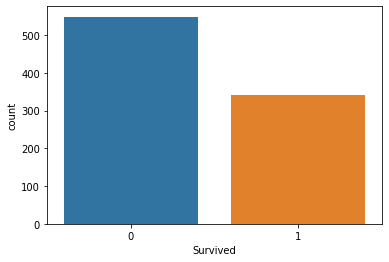

In [8]:
# 0의 비중이 조금 더 높은 불균형 레이블
sns.countplot(target)

In [9]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit 메서드는 실행 X
  def fit(self, X, y=None):
    pass

  # 남자면 0, 여자면 1인 간단한 예측 모형을 만듬  
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1: pred[i] = 0
      else: pred[i] = 1

    return pred

In [10]:
# 타이타닉 데이터

from sklearn.metrics import accuracy_score

myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)
pred = myclf.predict(x_test)

print('Dummy Classifier의 정확도: {:0.4f}'.format(accuracy_score(y_test, pred)))

Dummy Classifier의 정확도: 0.7877


단순히 여자는 1 남자는 0으로 예측한게 만든 정말 간단한 모델이지만 불균형 레이블의 경우 정확도가 상당히 높게 나온다는 것을 알 수 있음

따라서 불균형 레이블인 경우 정확도 지표가 좋은 평가지표는 아니라는 것을 알 수 있음

## MNIST 데이터셋

In [11]:
from sklearn.datasets import load_digits
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  # 입력값으로 들어오는 모든 데이터를 0으로 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [12]:
digits = load_digits()
seven = (digits.target == 7).astype(int)

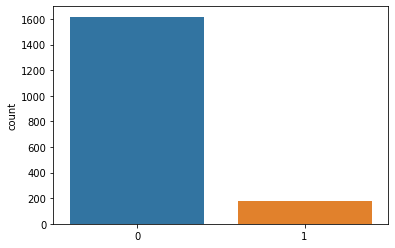

In [13]:
sns.countplot(seven)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, seven, random_state = 11)

레이블 테스트 세트 크기: (450,)
테스트 세트 0과 1의 분포도


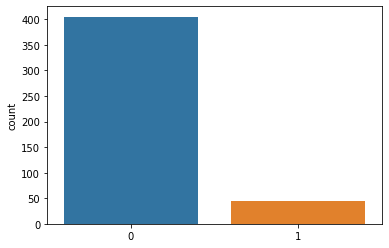

In [15]:
# 불균형 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 0과 1의 분포도')
sns.countplot(y_test)

In [16]:
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train, y_train)
pred = fakeclf.predict(x_test)

print('모든 예측을 0으로 하여도 정확도: {:0.4f}'.format(accuracy_score(y_test, pred)))

모든 예측을 0으로 하여도 정확도: 0.9000


이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 측정 수치로 사용돼서는 안된다.

# 오차행렬(Confusion Matrix)

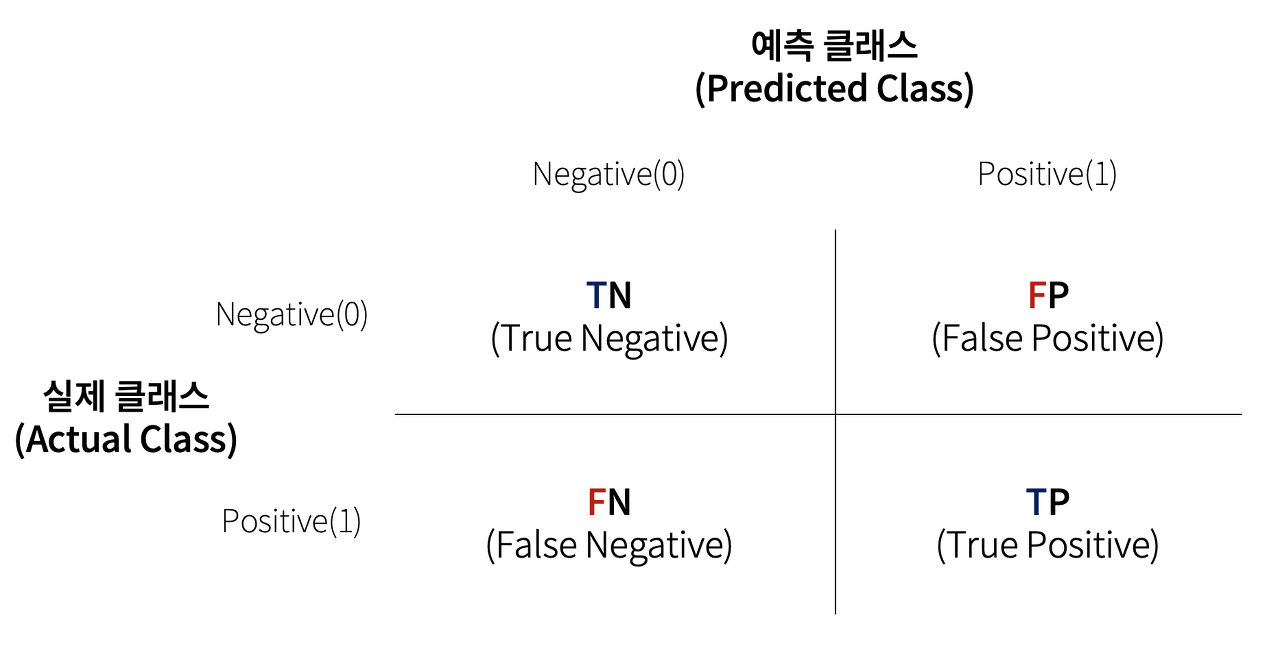

In [17]:
from IPython.display import Image

Image('https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEojHI%2FbtqBuwXbsUN%2F1Tt2KW49Zp8ZM7tpBWHUcK%2Fimg.png')

In [18]:
from sklearn.metrics import confusion_matrix

cf_m = confusion_matrix(y_test, pred)
cf_m

array([[405,   0],
       [ 45,   0]])

In [19]:
TN = cf_m[0,0]
FP = cf_m[0,1]
FN = cf_m[1,0]
TP = cf_m[1,1]

print('TN : {}, FP : {}, FN : {}, TP : {}'.format(TN, FP, FN, TP))

TN : 405, FP : 0, FN : 45, TP : 0


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print('정확도: ', accuracy_score(y_test, pred))
print('정밀도: ',  precision_score(y_test, pred))
print('재현율: ',  recall_score(y_test, pred))
print('오차 행렬')
confusion_matrix(y_test, pred)

정확도:  0.9
정밀도:  0.0
재현율:  0.0
오차 행렬


array([[405,   0],
       [ 45,   0]])

In [21]:
print('정확도: ', (TP + TN) / (TP + FN + FP + TN))
print('정밀도: ',  TP / (TP + FP))
print('재현율: ',  TP / (TP + FN))

정확도:  0.9
정밀도:  nan
재현율:  0.0


# 정밀도(Precision)

TP / (TP + FP)


# 재현율(Recall)

TP / (TP + FN)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [23]:
# 타이타닉 데이터셋 사용
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11)

In [24]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377


정밀도와 재현율을 트레이드 오프 관계

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 클래스 중 확률이 높은 값으로 예측 \n', pred_proba_result[:3])

두개의 클래스 중 확률이 높은 값으로 예측 
 [[0.39385414 0.60614586 1.        ]
 [0.8701051  0.1298949  0.        ]
 [0.84648986 0.15351014 0.        ]]


원리

임계치를 설정해서 해당 임계치를 넘으면 클래스를 반환

In [26]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold -> 임계치
# threshold 보다 같거나 작으면 0을 반환, 크면 1을 반환
binarizer = Binarizer(threshold= 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
from sklearn.preprocessing import Binarizer

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred_proba = lr_clf.predict_proba(x_test)
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

custom_threshold = 0.5

# 두번째 칼럼을 꺼내서 Binarizer를 적용
binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

# 기존 모델의 임계치는 0.5 임을 알 수 있음
get_clf_eval(y_test, custom_predict)

오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377


In [28]:
custom_threshold = 0.4

# 두번째 칼럼을 꺼내서 Binarizer를 적용
binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

# 임계치를 0.4 로 낮춤
get_clf_eval(y_test, custom_predict)

오차 행렬
[[102  16]
 [ 14  47]]
정확도 : 0.8324, 정밀도 : 0.7460, 재현율 : 0.7705


In [29]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('='*50)
    print('임계값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print('='*50)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[102  16]
 [ 14  47]]
정확도 : 0.8324, 정밀도 : 0.7460, 재현율 : 0.7705
임계값: 0.45
오차 행렬
[[108  10]
 [ 15  46]]
정확도 : 0.8603, 정밀도 : 0.8214, 재현율 : 0.7541
임계값: 0.5
오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377
임계값: 0.55
오차 행렬
[[111   7]
 [ 17  44]]
정확도 : 0.8659, 정밀도 : 0.8627, 재현율 : 0.7213
임계값: 0.6
오차 행렬
[[111   7]
 [ 18  43]]
정확도 : 0.8603, 정밀도 : 0.8600, 재현율 : 0.7049


임계치를 낮추니 재현율은 증가하고 정밀도는 감소함

이렇듯 두 요소는 트레이트 오프 관게임

In [30]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_c1 = pred_proba[:, 1].reshape(-1,1)

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
print('임계 값의 크기      : ', thresholds.shape)

thr_idx = np.arange(0, thresholds.shape[0], 15)
print('샘플 임계값의 인덱스: ', thr_idx)
print('샘플 임계값         : ', np.round(thresholds[thr_idx], 2))

print('샘플 임계값의 정밀도: ', np.round(precisions[thr_idx], 3))
print('샘플 임계값의 재현율: ', np.round(recalls[thr_idx], 3))

임계 값의 크기      :  (144,)
샘플 임계값의 인덱스:  [  0  15  30  45  60  75  90 105 120 135]
샘플 임계값         :  [0.12 0.14 0.15 0.19 0.21 0.3  0.46 0.66 0.74 0.92]
샘플 임계값의 정밀도:  [0.386 0.422 0.471 0.535 0.616 0.704 0.821 0.927 0.96  1.   ]
샘플 임계값의 재현율:  [1.    0.934 0.918 0.885 0.869 0.82  0.754 0.623 0.393 0.148]


그래프로 나타내기

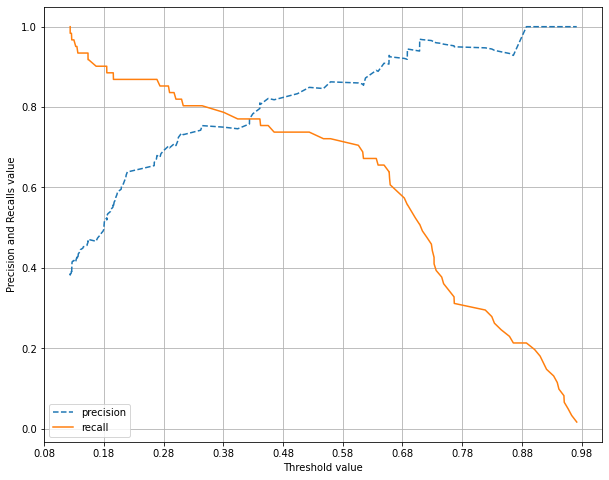

In [31]:
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(10,8))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recalls value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba_c1)

정밀도를 1로 만들기 위해서는 임계치 값을 높이고

재현율을 1로 만들기 위해서는 임계치 값을 낮추면 된다.

따라서 정밀도와 재현율 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용할 수 있는 평가 지표가 필요하다. 

**이것이 바로 F1 Score 이다.**

기술의 발전은 트레이드 오프 상의 곡선을 상향 시키기는데

이를 통해서 보면 두 측정 값을 모두 상향 시키기 위해서는 모델을 발전 시키는 것이다.

# F1 score

2 * (Precision * Recall) / (Precision + Recall)

= 2 * ((TP / (TP + FP)) * (TP / (TP + FN))) / ((TP / (TP + FP)) + (TP / (TP + FN)))

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 Score: ', f1)

F1 Score:  0.782608695652174


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 스코어: {3:.4f}'.format(accuracy, precision, recall, f1))

In [34]:
get_clf_eval(y_test, pred)

오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377, F1 스코어: 0.7826


In [35]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('='*50)
    print('임계값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print('='*50)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[102  16]
 [ 14  47]]
정확도 : 0.8324, 정밀도 : 0.7460, 재현율 : 0.7705, F1 스코어: 0.7581
임계값: 0.45
오차 행렬
[[108  10]
 [ 15  46]]
정확도 : 0.8603, 정밀도 : 0.8214, 재현율 : 0.7541, F1 스코어: 0.7863
임계값: 0.5
오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377, F1 스코어: 0.7826
임계값: 0.55
오차 행렬
[[111   7]
 [ 17  44]]
정확도 : 0.8659, 정밀도 : 0.8627, 재현율 : 0.7213, F1 스코어: 0.7857
임계값: 0.6
오차 행렬
[[111   7]
 [ 18  43]]
정확도 : 0.8603, 정밀도 : 0.8600, 재현율 : 0.7049, F1 스코어: 0.7748


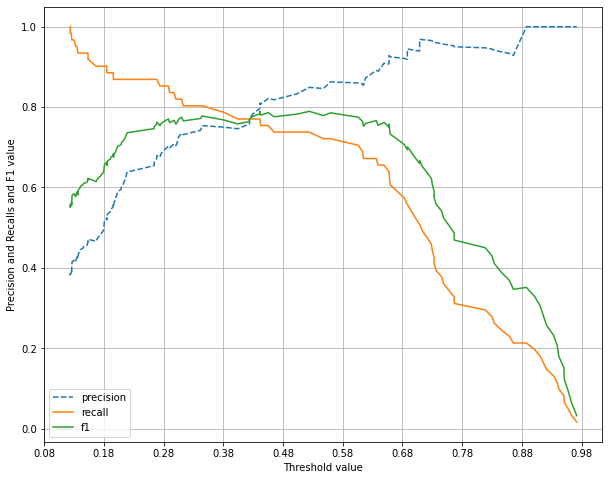

In [36]:
import matplotlib.ticker as ticker

def precision_recall_curve_plot_and_f1(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  f1 = 2 * (precisions * recalls) / (precisions + recalls)

  plt.figure(figsize=(10,8))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
  plt.plot(thresholds, f1[0:threshold_boundary], linestyle='-', label='f1')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recalls and F1 value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot_and_f1(y_test, pred_proba_c1)

F1 Scroe 는 정밀도와 재현율의 값이 서로 비슷할때 값이 가장 높다는 것을 알 수 있음

# ROC curve and AUC Score

ROC curve의 넓이를 구한 값이 AUC Score 이다.

따라서 그 값이 비율이기 때문에 다른 성능 지표와 다르게 확률을 통해서 구해야 한다.

1에 가까울 수록 성능 좋다고 할 수 있다.

ROC curve는 FPR(1 - 특이성)이 변할 때 TPR(민감도 == 재현율)이 어떻게 변화하는 지를 나타낸 곡선이다.

- FPR(1 - 특이성) : FP / (FP + TN) or 1 - TNR = 1 - (TN / (FP + TN))
- TNR(특이성) : TN / (FP + TN)
- TPR(민감도 == 재현율) : TP / (TP + FN)

In [37]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_c1 = pred_proba[:, 1].reshape(-1,1)

FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)
print('임계 값의 크기      : ', thresholds.shape)

thr_idx = np.arange(1, thresholds.shape[0], 5)
print('샘플 임계값의 인덱스: ', thr_idx)
print('샘플 임계값         : ', np.round(thresholds[thr_idx], 2))

print('샘플 임계값의 FPRs: ', np.round(FPRs[thr_idx], 3))
print('샘플 임계값의 TPRs: ', np.round(TPRs[thr_idx], 3))

임계 값의 크기      :  (58,)
샘플 임계값의 인덱스:  [ 1  6 11 16 21 26 31 36 41 46 51 56]
샘플 임계값         :  [0.97 0.71 0.66 0.61 0.46 0.31 0.29 0.19 0.17 0.13 0.13 0.12]
샘플 임계값의 FPRs:  [0.    0.008 0.025 0.059 0.085 0.153 0.186 0.407 0.534 0.661 0.763 0.822]
샘플 임계값의 TPRs:  [0.016 0.508 0.639 0.672 0.754 0.803 0.852 0.885 0.902 0.951 0.967 1.   ]


그래프로 나타내기

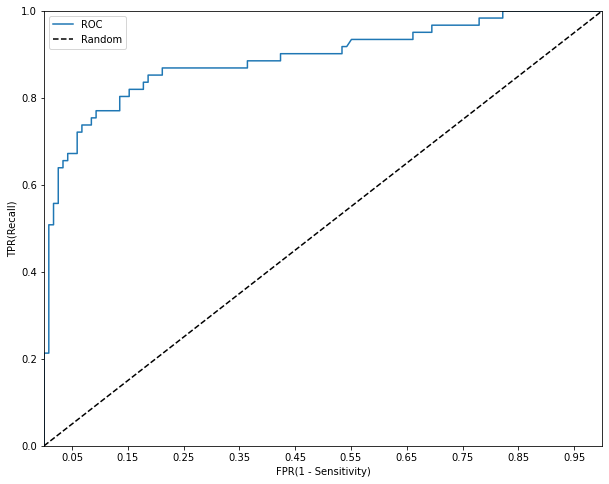

In [38]:
import matplotlib.ticker as ticker

def roc_curve_plot(y_test, pred_proba_c1):
  FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(10,8))
  # ROC 곡선을 그림
  plt.plot(FPRs, TPRs, label='ROC')
  # 가운데 대각선을 그림
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0, 1)
  plt.ylim(0, 1)
  plt.xlabel('FPR(1 - Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, pred_proba_c1)

In [39]:
from sklearn.metrics import roc_auc_score

print("AUC 값: ", roc_auc_score(y_test, pred_proba_c1))

AUC 값:  0.8908724645734927


# 정리

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/titanic_train.csv')

In [41]:
from sklearn.preprocessing import LabelEncoder

def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# 결측치 채우기
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Embarked'].fillna('S', inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

  return df

# 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  cols = ['Sex', 'Cabin', 'Embarked', 'Age_cat']
  for col in cols:
    le = LabelEncoder()
    le = le.fit(df[col])
    df[col] = le.transform(df[col])
  
  return df

# 전체 전처리 함수
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [42]:
target = df['Survived']
features = df.drop('Survived', axis=1)
features = transform_features(features)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 스코어: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=11)

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)
pred_proba_c1 = pred_proba[:, 1].reshape(-1,1)

get_clf_eval(y_test, pred, pred_proba_c1)

오차 행렬
[[109   9]
 [ 16  45]]
정확도 : 0.8603, 정밀도 : 0.8333, 재현율 : 0.7377, F1 스코어: 0.7826, AUC: 0.8909
